# Team 1 - CAP5619 Project
#### Marco Bogani, Sulaiman Karmali, Daman Sawhney, Ivan Lima

## Define the problem:

Considering the economic climate from 2022 to today, one of the most apparent changes that took place was car prices and sales. Dealerships continuously face the challenges, of optimizing sales strategies to cater to a multitude of diverse demographics and preferences. Our study aims to leverage our car sales dataset to predict future car sales trends, partition customers based on their purchase behavior, and determine the best pricing strategy for different car models. By applying regression models for sales forecasting, clustering techniques for customer segmentation, and machine learning algorithms for price optimization, this analysis aims to discover patterns and insights that can inform targeted marketing campaigns and efficient inventory management. Thus the overall goal is to enable dealerships to better understand their customers' preferences, better adjust to market climate changes, and ultimately improve both sales performance and customer satisfaction. Moreover, this comprehensive approach will let dealerships gain a competitive edge in the car market by making data-driven decisions that align with customer trends and expectations. 

## Load Libraries:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.utils import resample
from sklearn.cluster import KMeans

## Load Dataset:

In [7]:
# Load the data
#data = pd.read_csv('carSales.csv') #Full data - Long processsing time
#version '2' is a cut down dataset for faster testing
data = pd.read_csv(r"C:\Users\Setup User\Downloads\carSales2.csv") 
data.columns
data = data.drop(columns=['Customer Name','Dealer_Name','Phone','Dealer_No ','Car_id', 'Engine'])
data.head(5)

,Date,Gender,Annual Income,Company,Model,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,Auto,Red,24500,Hatchback,Janesville


## Summarize Data:

The dataset being worked with is clean when it comes to NaN and NULL values as shown below.

In [8]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# check for na or Null values
isnacount = data.isna().sum()
isnullcount = data.isnull().sum()

# print results
print("DataFrame data types: \n", data.dtypes)
print("NA data counts: \n", isnacount)
print("\nNULL data counts: \n", isnullcount)

DataFrame data types: 
 Date             datetime64[ns]
Gender                   object
Annual Income             int64
Company                  object
Model                    object
Transmission             object
Color                    object
Price ($)                 int64
Body Style               object
Dealer_Region            object
dtype: object
NA data counts: 
 Date             0
Gender           0
Annual Income    0
Company          0
Model            0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

NULL data counts: 
 Date             0
Gender           0
Annual Income    0
Company          0
Model            0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64


This shape can help understand the complexity of the dataset. It is important to remember the number of columns here as they will change when encoding occurs.

In [9]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 994
Number of columns: 10


Below, column info can be gathered. This is to better understand what data we are working with. This will also prepare us for feature selection.+

In [10]:
# Setup column name variable and empty dictionary
columns = ['Body Style','Model', 'Company', 'Color'] 
unique_values_dict = {}

for column in columns:
    unique_values_dict[column] = data[column].unique().tolist()

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

Body Style: ['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan']
Model: ['Expedition', 'Durango', 'Eldorado', 'Celica', 'TL', 'Diamante', 'Corolla', 'Galant', 'Malibu', 'Escort', 'RL', 'Pathfinder', 'Grand Marquis', '323i', 'Sebring Coupe', 'Forester', 'Accent', 'Land Cruiser', 'Accord', '4Runner', 'I30', 'A4', 'Carrera Cabrio', 'Jetta', 'Viper', 'Regal', 'LHS', 'LW', '3000GT', 'SLK230', 'Civic', 'S-Type', 'S40', 'Mountaineer', 'Park Avenue', 'Montero Sport', 'Sentra', 'S80', 'Lumina', 'Bonneville', 'C-Class', 'Altima', 'DeVille', 'Stratus', 'Cougar', 'SW', 'C70', 'SLK', 'Tacoma', 'M-Class', 'A6', 'Intrepid', 'Sienna', 'Eclipse', 'Contour', 'Town car', 'Focus', 'Mustang', 'Cutlass', 'Corvette', 'Impala', 'Cabrio', 'Dakota', '300M', '328i', 'Bravada', 'Maxima', 'Ram Pickup', 'Concorde', 'V70', 'Quest', 'ES300', 'SL-Class', 'Explorer', 'Prizm', 'Camaro', 'Outback', 'Taurus', 'Cavalier', 'GS400', 'Monte Carlo', 'Sonata', 'Sable', 'Metro', 'Voyager', 'Cirrus', 'Avenger', 'Odyssey', 'Intri

Above, it can be seen that the Engine column has a corrupted character and that there are no similar features like 'light blue' or 'dark blue.'

In [11]:
# Change just the engine column to correct typo
data['Model'] = data['Model'].replace('Eldorado', 'El Dorado')


Below is a complete verification of columns and their unique value syntax validation.

In [12]:
# Setup column name variable and empty dictionary
columns = ['Body Style','Color','Transmission','Gender','Price ($)','Model']  # replace with your actual column names
unique_values_dict = {}

for column in columns:
    unique_values_dict[column] = data[column].unique().tolist()

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"{column}: {unique_values}")

Body Style: ['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan']
Color: ['Black', 'Red', 'Pale White']
Transmission: ['Auto', 'Manual']
Gender: ['Male', 'Female']
Price ($): [26000, 19000, 31500, 14000, 24500, 12000, 42000, 82000, 15000, 31000, 46000, 9000, 17000, 18000, 33000, 21000, 25000, 22000, 31250, 41000, 13000, 20000, 43000, 16000, 61000, 39000, 42500, 45001, 36001, 21001, 29000, 27000, 25600, 36000, 31100, 22600, 45000, 62000, 22700, 49000, 28000, 22001, 25001, 12800, 22500, 46500, 54000, 16001, 38000, 21200, 71000, 57001, 62001, 69001, 20001, 26750, 24000, 28501, 15500, 12500, 27250, 11000, 26500, 69000, 14150, 60500, 44000, 11650, 11800, 27500, 16900, 14200, 51000, 32000, 39500, 13500, 9250, 29500, 18501, 17001, 23500, 53000, 60750, 24001, 35000, 18500, 21500, 41100, 20200, 59000, 57000, 25500, 19100, 10000, 23000, 11501, 24250, 37000, 54500, 25100, 34000, 21900, 29200, 85000, 43500, 14500, 16500, 85600, 75000, 71500, 61500, 19500, 29001, 60000, 28001, 60001, 22100, 21100, 

## Descriptive Statistics & Data Visualizations:

At this point, only Annual Income and Price are the numerical columns in the dataframe. We can see their quartiles, minimum and maximum values, etc.

In [13]:
dfdesc = data.describe()
dfdesc.round(2)

,Date,Annual Income,Price ($)
count,994,994.00,994.00
mean,2022-02-12 08:56:00.965794816,855035.33,27686.26
min,2022-01-02 00:00:00,13500.00,9000.00
25%,2022-01-23 00:00:00,387000.00,18000.00
50%,2022-02-15 00:00:00,760000.00,22675.00
75%,2022-03-05 00:00:00,1257500.00,33000.00
max,2022-03-19 00:00:00,4735000.00,85600.00
std,NaN,706592.17,14184.53


To better understand underlying correlations which will help us better build the prediction model, we must remove outlier data. In the visualizations below, you can see how removing outliers makes the data more legible and the smaller differences in class trends can be observed.

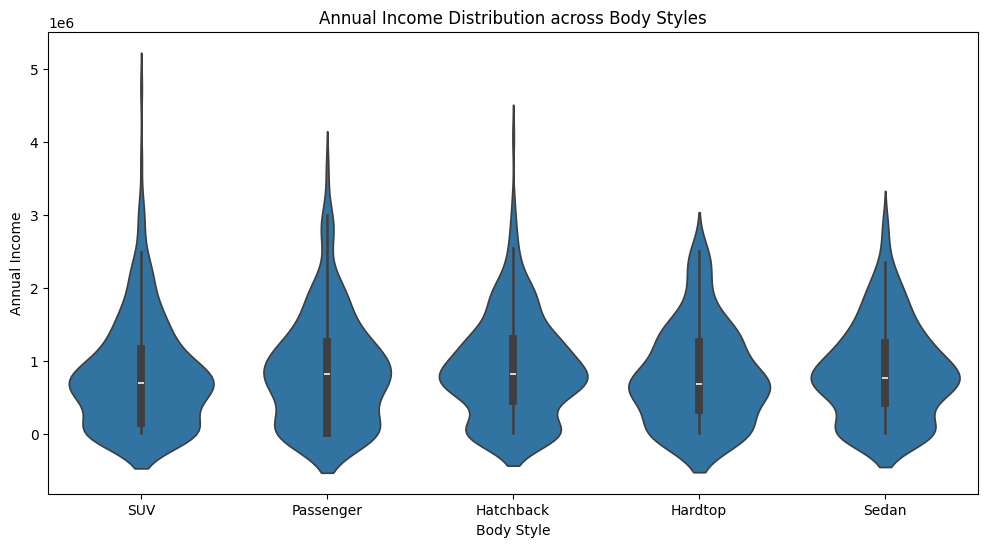

In [14]:
# Visualize with basic dataframe without any preprocessing
plt.figure(figsize=(12, 6))
sns.violinplot(x='Body Style', y='Annual Income', data=data)
plt.title('Annual Income Distribution across Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Annual Income')
plt.show()

Only Annual Income was refined for outliers as that data is primary value that can be uncorrelated to the price of a purchased vehice.

In [15]:
# Calculate the Inter Quartile Range for Annual Income
Q1 = data['Annual Income'].quantile(0.25)
Q3 = data['Annual Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the cutoff for outliers
cutoff = IQR * 1.5

# Determine the bounds for the outliers
lower_bound = Q1 - cutoff
upper_bound = Q3 + cutoff

df_outliers = data[(data['Annual Income'] < lower_bound) | (data['Annual Income'] > upper_bound)]

# Print the outliers
print("Annual Income class outliers:\n", df_outliers['Annual Income'].head(5))

# Filter the dataframe to remove outliers from 'Annual Income'
df = data[(data['Annual Income'] >= lower_bound) & (data['Annual Income'] <= upper_bound)]

# Check if any values in the filtered DataFrame fall outside the bounds
outliers_present = any((data['Annual Income'] < lower_bound) | (data['Annual Income'] > upper_bound))

# Print result and confirm process complete.
if outliers_present:
    print("Outliers were not removed correctly.")
else:
    print("Outliers were removed correctly.")

Annual Income class outliers:
 48     4060000
122    3000000
125    2800000
158    2750000
174    2810000
Name: Annual Income, dtype: int64
Outliers were not removed correctly.


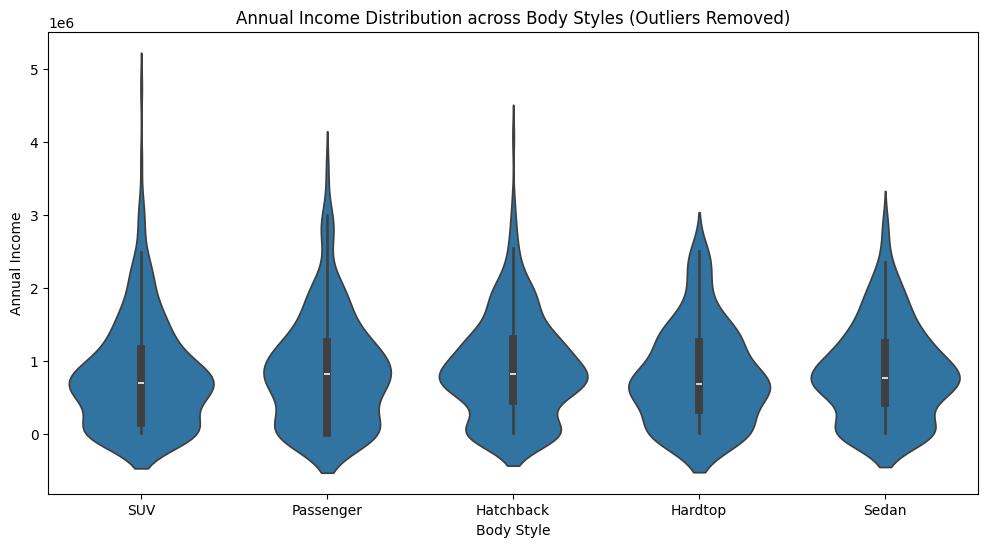

In [16]:
# Now visualized the data without outliers
plt.figure(figsize=(12, 6))
sns.violinplot(x='Body Style', y='Annual Income', data=data)
plt.title('Annual Income Distribution across Body Styles (Outliers Removed)')
plt.xlabel('Body Style')
plt.ylabel('Annual Income')
plt.show()

In this particular context, since the pinching occurs at a similar income level across all body styles, it could indicate a common income value around which fewer people purchase cars, regardless of the body style. This might suggest a market segment that is underserved or has fewer customers.

## Clean & Prepare Data:

Since the dataset ranges over 2 years, the significant trends in an established industry are not intense. As such, it is decided removing date from the data would not have a meaningful impact to the model's performance.

Model was the only class with many features and was label encoded instead to keep our dataset from getting too large.

In [17]:
remappeddf = data.copy()
remappeddf.drop(columns=['Date'], inplace=True)

# Setup the label encoder
le = LabelEncoder()

# Fit and transform the 'Model' column
remappeddf['Model'] = le.fit_transform(remappeddf['Model'])
remappeddf['Company'] = le.fit_transform(remappeddf['Company'])

print(remappeddf.head(5))

  Gender  Annual Income  Company  Model Transmission       Color  Price ($)  \
0   Male          13500        8     58         Auto       Black      26000   
1   Male        1480000        7     50         Auto       Black      19000   
2   Male        1035000        4     54       Manual         Red      31500   
3   Male          13500       27     35       Manual  Pale White      14000   
4   Male        1465000        0    138         Auto         Red      24500   

  Body Style Dealer_Region  
0        SUV    Middletown  
1        SUV        Aurora  
2  Passenger    Greenville  
3        SUV         Pasco  
4  Hatchback    Janesville  


## Feature Selection and Data Transformations

Features above have a few classes except Price and model. One Hot encoding will be good for the features which are not Price and Model. For the Model class, a label encoder is used due to the large amount of models. MixMax scaling was applied to Annual income and Price ($) data to make it more normalized.

In [18]:
le = LabelEncoder()

# Fit and transform the 'Model' column
remappeddf['Model'] = le.fit_transform(remappeddf['Model'])
remappeddf['Company'] = le.fit_transform(remappeddf['Company'])


categorical_columns = ['Body Style', 'Dealer_Region', 'Color', 'Transmission', 'Gender']  # Categorical columns
# Keeping only the categorical columns for encoding
remappeddf_categorical = remappeddf[categorical_columns]

encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(remappeddf_categorical).toarray()
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded DataFrame with the rest of the data and exlude the original categorical columns for redundancy sake
df_rest = remappeddf.drop(columns=categorical_columns)
df_combined = pd.concat([df_rest, df_encoded], axis=1)

# Print preview of the combined DataFrame
print(df_combined.head())  

   Annual Income  Company  Model  Price ($)  Body Style_Hardtop  \
0          13500        8     58      26000                 0.0   
1        1480000        7     50      19000                 0.0   
2        1035000        4     54      31500                 0.0   
3          13500       27     35      14000                 0.0   
4        1465000        0    138      24500                 0.0   

   Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
0                   0.0                   0.0             1.0   
1                   0.0                   0.0             1.0   
2                   0.0                   1.0             0.0   
3                   0.0                   0.0             1.0   
4                   1.0                   0.0             0.0   

   Body Style_Sedan  Dealer_Region_Aurora  ...  Dealer_Region_Middletown  \
0               0.0                   0.0  ...                       1.0   
1               0.0                   1.0  ...        

Below, you can see the number of rows has decreased from data cleaning and the number of columns has increased due to encoding.

In [19]:
# Get the number of rows and columns
num_rows, num_columns = df_combined.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Post processing statistics of the dataset/ dataframe 
print("\nRemapped DataFrame: \n\n", df_combined.describe().round(3))  # This will give you count, mean, std, min, 25%, 50%, 75%, max
print('\nVariance values: \n\n', df_combined.var().astype('Float32'))  # Variance
print('\nSkew measurement: \n\n',df_combined.skew().round(4))  # Skewness

Number of rows: 994
Number of columns: 23

Remapped DataFrame: 

        Annual Income  Company    Model  Price ($)  Body Style_Hardtop  \
count        994.000  994.000  994.000    994.000             994.000   
mean      855035.327   14.181   75.016  27686.263               0.090   
std       706592.169    8.669   43.449  14184.532               0.286   
min        13500.000    0.000    0.000   9000.000               0.000   
25%       387000.000    7.000   39.250  18000.000               0.000   
50%       760000.000   15.000   78.000  22675.000               0.000   
75%      1257500.000   20.000  111.000  33000.000               0.000   
max      4735000.000   29.000  150.000  85600.000               1.000   

       Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
count               994.000               994.000         994.000   
mean                  0.297                 0.158           0.281   
std                   0.457                 0.365           0.450   


MinMaxScaler was chosen for Annual Income and Price because the rest of the dataset is so ingrained with binary data, have a normalized range between 0 and 1 for these classes worked well.

In [20]:
na_count = df_combined['Annual Income'].isna().sum()
print(na_count)

0


In [21]:

# Setup the scalar
scaler = MinMaxScaler()

# Select the columns to be normalized
columns_to_normalize = ['Annual Income','Price ($)']  # Replace with your actual column names

# Normalize the selected columns
df_normalized = df_combined.copy()
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Print the normalized dataframe
print(df_normalized.head())


   Annual Income  Company  Model  Price ($)  Body Style_Hardtop  \
0       0.000000        8     58   0.221932                 0.0   
1       0.310600        7     50   0.130548                 0.0   
2       0.216351        4     54   0.293734                 0.0   
3       0.000000       27     35   0.065274                 0.0   
4       0.307423        0    138   0.202350                 0.0   

   Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
0                   0.0                   0.0             1.0   
1                   0.0                   0.0             1.0   
2                   0.0                   1.0             0.0   
3                   0.0                   0.0             1.0   
4                   1.0                   0.0             0.0   

   Body Style_Sedan  Dealer_Region_Aurora  ...  Dealer_Region_Middletown  \
0               0.0                   0.0  ...                       1.0   
1               0.0                   1.0  ...        

Below, the dataset's Gender_Male feature is undersampled so that there is a normal distribution of males & females in the dataset.

In [22]:
print("Before sampling: \n", df_normalized.Gender_Male.value_counts())

# Separate majority and minority classes
df_majority = df_normalized[df_normalized.Gender_Male==1]
df_minority = df_normalized[df_normalized.Gender_Male==0]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print("\nAfter sampling: \n",df_downsampled.Gender_Male.value_counts())
print(df_downsampled.head())

Before sampling: 
 Gender_Male
1.0    752
0.0    242
Name: count, dtype: int64

After sampling: 
 Gender_Male
1.0    242
0.0    242
Name: count, dtype: int64
     Annual Income  Company  Model  Price ($)  Body Style_Hardtop  \
176       0.000000       16    125   0.104439                 0.0   
868       0.403791       15    142   0.104439                 0.0   
562       0.000000       28     79   0.169713                 0.0   
203       0.380493       25     83   0.052219                 0.0   
405       0.168696       18     49   0.169713                 0.0   

     Body Style_Hatchback  Body Style_Passenger  Body Style_SUV  \
176                   0.0                   1.0             0.0   
868                   1.0                   0.0             0.0   
562                   0.0                   1.0             0.0   
203                   1.0                   0.0             0.0   
405                   1.0                   0.0             0.0   

     Body Style_Sedan  D

In [23]:
# Set up the X and y variables
features = ['Annual Income','Company', 'Dealer_Region', 'Price ($)']
X = data[features]
y = data['Gender']  # target variable

# Preprocessing: Numeric features scaling and Categorical features encoding
numeric_features = ['Annual Income', 'Price ($)']
numeric_transformer = StandardScaler()

categorical_features = ['Price ($)', 'Dealer_Region']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Spot Check Algorithms
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=10000)
}

In [25]:
# Transformer for converting sparse matrices to dense
class DenseTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        if scipy.sparse.issparse(X):
            return X.toarray()
        else:
            return X

In [26]:
# Evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('to_dense', DenseTransformer()),  # This will convert sparse output to dense
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    y_proba = pipeline.predict_proba(X_val)[:, 1]#'[:, 1]' forces array to be 1D

    print(f'{name} Metrics:')
    print('Accuracy:\t', accuracy_score(y_val, y_pred))
    print('Precision:\t', precision_score(y_val, y_pred, average='macro', zero_division=1))
    print('Recall:\t\t', recall_score(y_val, y_pred, average='macro', zero_division=1))
    print('F1-Score:\t', f1_score(y_val, y_pred, average='macro', zero_division=1))
    print('AUC:\t\t', roc_auc_score(y_val, y_proba, multi_class='ovo', average='macro'), '\n')

Naive Bayes Metrics:
Accuracy:	 0.2964824120603015
Precision:	 0.47067736185383247
Recall:		 0.4754770423375074
F1-Score:	 0.2950404858299595
AUC:		 0.4552772808586762 



SVM Metrics:
Accuracy:	 0.7738693467336684
Precision:	 0.5173076923076922
Recall:		 0.5020125223613595
F1-Score:	 0.45717403164211673
AUC:		 0.4461091234347048 

Neural Network Metrics:
Accuracy:	 0.6733668341708543
Precision:	 0.529127593066212
Recall:		 0.5305605247465712
F1-Score:	 0.5296534671466492
AUC:		 0.49962731067382227 



**Propose strategies to improve the performance of the selected models through data preprocessing, feature engineering, and hyperparameter tuning.**

* *Data Preprocessing*:
Verifies all missing values are handled, through imputation or removal. Then Normalize or standardize numerical features to ensure proper equal weighting. Lastly, Encode categorical variables appropriately.
* *Feature Engineering*:
Creating new features that might be relevant for the prediction, such as extracting information from dates or aggregating categorical variables.
* *Hyperparameter Tuning*:
Use grid search or random search to find the optimal hyperparameters for each model. This process can be integrated into the pipelines with either "GridSearchCV" or "RandomizedSearchCV".
* *Model Complexity*: 
For neural networks - experiment with different architectures, adding layers, or changing the activation functions. For SVM - try different kernels. And For Naive Bayes - there's limited scope for tuning, but ensuring feature independence could help.

In [35]:
# Ensemble Models with Pipelines
ensemble_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('gnb', GaussianNB())], voting='soft')
}

for name, model in ensemble_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('to_dense', DenseTransformer()),  # This will convert sparse output to dense
                               ('clustering', KMeans(n_clusters=3)),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    y_proba = pipeline.predict_proba(X_val)[:, 1]#'[:, 1]' forces array to be 1D

    print(f'***{name} Ensemble Metrics***')
    print('Accuracy:\t', accuracy_score(y_val, y_pred))
    print('Precision:\t', precision_score(y_val, y_pred, average='macro', zero_division=1))
    print('Recall:\t\t', recall_score(y_val, y_pred, average='macro', zero_division=1))
    print('F1-Score:\t', f1_score(y_val, y_pred, average='macro', zero_division=1))
    print('AUC:\t\t', roc_auc_score(y_val, y_proba, multi_class='ovr', average='macro'), '\n')
    print('')

***Random Forest Ensemble Metrics***
Accuracy:	 0.7185929648241206
Precision:	 0.5249784668389319
Recall:		 0.5172927847346452
F1-Score:	 0.5146341463414634
AUC:		 0.5372689326177699 


***Gradient Boosting Ensemble Metrics***
Accuracy:	 0.7587939698492462
Precision:	 0.5490074441687345
Recall:		 0.5176654740608229
F1-Score:	 0.5012531328320802
AUC:		 0.5596302921884317 


***Voting Classifier Ensemble Metrics***
Accuracy:	 0.7839195979899497
Precision:	 0.8919597989949748
Recall:		 0.5
F1-Score:	 0.4394366197183099
AUC:		 0.5544871794871794 


